In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

from io import BytesIO
import requests
import time
import os

from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import pearsonr, spearmanr

import warnings
warnings.filterwarnings("ignore")

# pip install alpha_vantage

## Extracting the Stock Prices Data for the US and China Companies

#### List of 10 tech companies listed on the New York Stock Exchange (NYSE):

- Apple Inc. (AAPL)
- Advanced Micro Devices, Inc. (AMD)
- Cisco Systems, Inc. (CSCO)
- Alphabet Inc. (formerly known as Google Inc.) (GOOGL)
- International Business Machines Corporation (IBM)
- Intel Corporation (INTC)
- Juniper Networks, Inc. (JNPR)
- Netflix, Inc. (NFLX)
- Oracle Corporation (ORCL)
- Xerox Holdings Corporation (XRX)

#### List of 10 tech companies listed on the Shanghai Stock Exchange:

- Alibaba Group Holding Limited (BABA)
- Baidu, Inc. (BIDU)
- iQIYI, Inc. (IQ)
- JD.com, Inc. (JD)
- Momo Inc. (MOMO)
- NIO Inc. (NIO)
- NetEase, Inc. (NTES)
- Pinduoduo Inc. (PDD)
- Trip.com Group Limited (TCOM)
- Weibo Corporation (WB)

In [2]:
# List of ticker symbols for the tech companies in the US and China
US_ticker_symbols = ["AAPL", "AMD", "CSCO", "GOOGL", "IBM", "INTC", "JNPR", "NFLX", "ORCL", "XRX"]
China_ticker_symbols = ["BABA", "BIDU", "IQ", "JD", "MOMO", "NIO", "NTES", "PDD", "TCOM", "WB"]

In [3]:
def get_quarterly_stock_prices(symbol):
    # Ticker symbol
    ticker = yf.Ticker(symbol)

    # Desired time range
    start_date = '2018-01-01'  # Start date
    end_date = '2023-01-01'    # End date

    # Get the historical data for the stock within the specified time range
    historical_data = ticker.history(start=start_date, end=end_date, interval='1d')

    # Resample the data to quarterly frequency
    quarterly_data = historical_data.resample('Q').last()

    return quarterly_data

In [4]:
# Call the get_quarterly_stock_prices function to generate the US stock prices

# Create an empty dictionary to store the stock prices for each company
US_stock_prices = {}
for symbol in US_ticker_symbols:
    quarterly_prices = get_quarterly_stock_prices(symbol)
    stock = pd.DataFrame(quarterly_prices).reset_index()
    
    US_stock_prices['Date'] = stock['Date']
    US_stock_prices[f'{symbol}'] = stock['Close']
    
# Convert the extracted stock prices to DataFrame
US_stock_prices = pd.DataFrame(US_stock_prices)

In [5]:
# Print the first 10 rows
US_stock_prices.head(10)

,Date,AAPL,AMD,CSCO,GOOGL,IBM,INTC,JNPR,NFLX,ORCL,XRX
0,2018-03-31 00:00:00-04:00,39.931828,10.050000,36.570091,51.856998,113.593033,44.914780,20.990885,295.350006,41.945114,22.934616
1,2018-06-30 00:00:00-04:00,44.226261,14.990000,36.984398,56.459499,104.576103,43.118259,23.815577,391.429993,40.562935,19.322546
2,2018-09-30 00:00:00-04:00,54.122688,30.889999,42.140720,60.354000,114.415062,41.268620,26.194773,374.130005,47.653835,21.924015
3,2018-12-31 00:00:00-05:00,37.951187,18.459999,37.786282,52.248001,87.105392,41.212193,23.665522,267.660004,41.897465,16.263628
4,2019-03-31 00:00:00-04:00,45.896694,25.520000,47.446972,58.844501,109.384811,47.456280,23.440756,356.559998,50.038143,26.530228
5,2019-06-30 00:00:00-04:00,48.006615,30.370001,48.401817,54.139999,108.173935,42.563210,23.761171,367.320007,53.312973,29.585243
6,2019-09-30 00:00:00-04:00,54.531597,28.990000,43.972710,61.056999,115.416992,46.126812,22.266373,267.619995,51.705967,25.197241
7,2019-12-31 00:00:00-05:00,71.711739,45.860001,43.005554,66.969498,107.641418,53.869274,22.326279,323.570007,50.001812,31.270123
8,2020-03-31 00:00:00-04:00,62.247093,45.480000,35.508266,58.097500,90.013069,48.951748,17.510874,375.500000,45.816235,16.063364
9,2020-06-30 00:00:00-04:00,89.540329,52.610001,42.528801,70.902496,99.311890,54.422165,21.092081,455.040009,52.644173,13.186631


In [6]:
# Call the get_quarterly_stock_prices function to generate the China stock prices

# Create an empty dictionary to store the stock prices for each company
China_stock_prices = {}
for symbol in China_ticker_symbols:
    quarterly_prices = get_quarterly_stock_prices(symbol)
    stock = pd.DataFrame(quarterly_prices).reset_index()
    
    China_stock_prices['Date'] = stock['Date']
    China_stock_prices[f'{symbol}'] = stock['Close']
    
# Convert the extracted stock prices to DataFrame
China_stock_prices = pd.DataFrame(China_stock_prices)

In [7]:
# Print the first 10 rows
China_stock_prices.head(10)

,Date,BABA,BIDU,IQ,JD,MOMO,NIO,NTES,PDD,TCOM,WB
0,2018-03-31 00:00:00-04:00,183.539993,223.190002,15.550000,38.908337,27.542143,6.980000,51.818851,26.290001,46.619999,119.540001
1,2018-06-30 00:00:00-04:00,185.529999,243.000000,32.299999,37.428493,32.051449,6.370000,46.743271,22.440001,47.630001,88.760002
2,2018-09-30 00:00:00-04:00,164.759995,228.679993,27.070000,25.070845,32.272495,5.100000,42.347736,24.799999,37.169998,73.129997
3,2018-12-31 00:00:00-05:00,137.070007,158.600006,14.870000,20.112411,17.499355,2.550000,43.753006,20.629999,27.059999,58.430000
4,2019-03-31 00:00:00-04:00,182.449997,164.850006,23.920000,28.972246,28.175804,1.560000,44.976368,32.220001,43.689999,61.990002
5,2019-06-30 00:00:00-04:00,169.449997,117.360001,20.650000,29.106779,26.786320,4.020000,47.776527,37.820000,36.910000,43.549999
6,2019-09-30 00:00:00-04:00,167.229996,102.760002,16.129999,27.108028,23.179895,2.780000,49.926006,36.029999,29.290001,44.750000
7,2019-12-31 00:00:00-05:00,212.100006,126.400002,21.110001,33.853806,25.065414,7.720000,58.919872,85.839996,33.540001,46.349998
8,2020-03-31 00:00:00-04:00,194.479996,100.790001,17.799999,38.917946,16.228920,21.219999,61.866127,74.150002,23.450001,33.110001
9,2020-06-30 00:00:00-04:00,215.699997,119.889999,23.190001,57.829185,13.558637,48.740002,82.990974,177.669998,25.920000,33.599998


## Extracting the Earnings Announcement Data for the US and China Companies

In [8]:
BASE_URL = r"https://www.alphavantage.co/query?"
    
def earnings_history_api(api_key, symbol):
    assert symbol is not None
    symbol = symbol.strip().upper()

    url = f"{BASE_URL}function=EARNINGS&symbol={symbol}&apikey={api_key}"

    response = requests.get(url)

    return response.json()['quarterlyEarnings']


# for stock in US_ticker_symbols:
# eh = earnings_history_api("B1V9DWS3S45H4N8P", "MOMO")
# stock_eh = pd.DataFrame(eh)
# stock_eh
# stock_eh.to_csv("MOMO.csv")

In [9]:
# Reading in US earnings dataset

folderpath = r"C:\Users\isichei\Documents\Git\MScFE_690_Capstone_-The-Impact-of-Earnings-Announcements-on-Stock-Prices-A-Comparative-Study-of-Tec\us_data"
filepaths  = [os.path.join(folderpath, name) for name in os.listdir(folderpath)]
US_data = []

for path in filepaths:
    with open(path, 'r') as f:
        file = pd.read_csv(f)
        US_data.append(file)

In [10]:
# Call the earnings_history_api function to generate the US earnings

# Create an empty dictionary to store the earning for each company
US_earnings = {}
for symbol, data in zip(US_ticker_symbols, US_data):
    
    US_earnings['Date'] = (data[(data['fiscalDateEnding'] >= "2018-01-01") 
                                    & (data['fiscalDateEnding'] <= "2023-12-31")]['fiscalDateEnding'])
    US_earnings[f'{symbol}'] = (data[(data['fiscalDateEnding'] >= "2018-01-01") 
                                    & (data['fiscalDateEnding'] <= "2023-12-31")]['reportedEPS'])
    
# Convert the extracted stock prices to DataFrame
US_earnings = pd.DataFrame(US_earnings)

In [11]:
US_earnings.head(10)

,Date,AAPL,AMD,CSCO,GOOGL,IBM,INTC,JNPR,NFLX,ORCL,XRX
0,2023-03-31,1.52,0.60,0.00,1.17,1.36,-0.04,0.48,2.88,1.22,0.49
1,2022-12-31,1.88,0.69,0.88,1.05,3.60,0.10,0.65,0.12,1.21,0.89
2,2022-09-30,1.29,0.67,0.86,1.06,1.81,0.59,0.58,3.10,1.03,0.19
3,2022-06-30,1.20,1.05,0.83,1.21,2.31,0.29,0.42,3.20,1.54,0.13
4,2022-03-31,1.52,1.13,0.87,1.23,1.40,0.87,0.31,3.53,1.13,-0.12
5,2021-12-31,2.10,0.92,0.84,1.53,3.35,1.09,0.56,1.33,1.21,0.34
6,2021-09-30,1.24,0.73,0.82,1.40,2.52,1.71,0.46,3.19,1.03,0.48
7,2021-06-30,1.30,0.63,0.84,1.36,2.33,1.28,0.43,2.97,1.54,0.47
8,2021-03-31,1.40,0.52,0.83,1.31,1.77,1.39,0.30,3.75,1.16,0.22
9,2020-12-31,1.68,0.52,0.79,1.12,2.07,1.52,0.55,1.19,1.06,0.58


In [12]:
# Reading in China earnings dataset

folderpath = r"C:\Users\isichei\Documents\Git\MScFE_690_Capstone_-The-Impact-of-Earnings-Announcements-on-Stock-Prices-A-Comparative-Study-of-Tec\china_data" 
filepaths  = [os.path.join(folderpath, name) for name in os.listdir(folderpath)]
China_data = []

for path in filepaths:
    with open(path, 'r') as f:
        file = pd.read_csv(f)
        China_data.append(file)

In [13]:
# Call the earnings_history_api function to generate the China earnings

# Create an empty dictionary to store the earning for each company
China_earnings = {}
for symbol, data in zip(China_ticker_symbols, China_data):
    
    China_earnings['Date'] = (data[(data['fiscalDateEnding'] >= "2018-01-01") 
                                    & (data['fiscalDateEnding'] <= "2023-12-31")]['fiscalDateEnding'])
    China_earnings[f'{symbol}'] = (data[(data['fiscalDateEnding'] >= "2018-01-01") 
                                    & (data['fiscalDateEnding'] <= "2023-12-31")]['reportedEPS'])
    
# Convert the extracted stock prices to DataFrame
China_earnings = pd.DataFrame(China_earnings)

In [14]:
China_earnings.head(10)

,Date,BABA,BIDU,IQ,JD,MOMO,NIO,NTES,PDD,TCOM,WB
0,2022-12-31,19.26,16.10,0.97,4.76,2.46,-3.07,7.35,8.34,0.76,0.75
1,2022-09-30,12.92,15.36,0.35,4.81,2.60,-2.11,11.35,8.62,1.58,0.50
2,2022-06-30,11.68,16.87,-0.46,6.27,2.22,-1.34,8.20,7.54,-0.31,0.46
3,2022-03-31,7.95,15.79,-0.28,4.06,1.94,-0.79,7.70,2.95,-0.06,0.56
4,2021-12-31,16.87,11.22,0.21,2.53,1.38,-1.36,9.80,5.88,0.48,0.83
5,2021-09-30,11.20,11.50,-2.02,2.21,2.61,-1.82,5.75,2.18,0.81,0.90
6,2021-06-30,16.60,14.66,-2.17,3.16,2.54,-0.42,6.24,2.85,1.13,0.79
7,2021-03-31,10.32,15.41,-1.75,2.90,2.91,-3.14,7.47,-1.52,-0.34,0.57
8,2020-12-31,22.03,12.38,-1.61,2.47,3.72,-1.05,2.35,-0.15,1.75,0.92
9,2020-09-30,17.97,20.08,-2.10,1.49,2.98,-0.82,5.35,0.33,2.32,0.66


In [15]:
# # Call the earnings_history_api function to generate the China earnings
# api_key = "B1V9DWS3S45H4N8P"

# # Create an empty dictionary to store the earning for each company
# China_earnings = {}
# for symbol in China_ticker_symbols:
#     earnings = earnings_history_api(api_key, symbol)
#     #earnings_df = pd.DataFrame(quarterly_prices).reset_index()#['Date']
    
#     China_earnings['Date'] = (earnings[(earnings['fiscalDateEnding'] >= "2018-01-01") 
#                                     & (earnings['fiscalDateEnding'] <= "2023-12-31")]['fiscalDateEnding'])
#     China_earnings[f'{symbol}'] = (earnings[(earnings['fiscalDateEnding'] >= "2018-01-01") 
#                                     & (earnings['fiscalDateEnding'] <= "2023-12-31")]['reportedEPS'])
    
# # Convert the extracted stock prices to DataFrame
# China_earnings = pd.DataFrame(China_earnings)

## Descriptive Analysis

#### Descriptive Statistics for US Tech Companies

In [16]:
# Estimating the overall earnings and stock prices for US Tech Companies
US_earnings['Earnings'] = US_earnings.mean(axis=1)
US_stock_prices['Stock_prices'] = US_stock_prices.mean(axis=1)

# Calculate summary statistics
US_earnings_mean = US_earnings['Earnings'].mean()
US_earnings_median = US_earnings['Earnings'].median()
US_earnings_std = US_earnings['Earnings'].std()
US_earnings_range = US_earnings['Earnings'].max() - US_earnings['Earnings'].min()

US_stock_prices_mean = US_stock_prices['Stock_prices'].mean()
US_stock_prices_median = US_stock_prices['Stock_prices'].median()
US_stock_prices_std = US_stock_prices['Stock_prices'].std()
US_stock_prices_range = US_stock_prices['Stock_prices'].max() - US_stock_prices['Stock_prices'].min()


# Create a dictionary for the descriptive statistics
US_descriptive_stat = {}

# Calculate summary statistics
US_descriptive_stat["Summary Statistics"] = ['Mean', 'Median', 'Standard Deviation', 'Range']
US_descriptive_stat["Earnings"] = [US_earnings_mean, US_earnings_median, US_earnings_std, US_earnings_range]
US_descriptive_stat['Stock Prices'] = [US_stock_prices_mean, US_stock_prices_median, US_stock_prices_std, US_stock_prices_range]


# Display summary statistics
pd.DataFrame(US_descriptive_stat)

,Summary Statistics,Earnings,Stock Prices
0,Mean,1.057386,94.162709
1,Median,1.064800,81.728600
2,Standard Deviation,0.204194,23.120564
3,Range,0.728000,81.678672


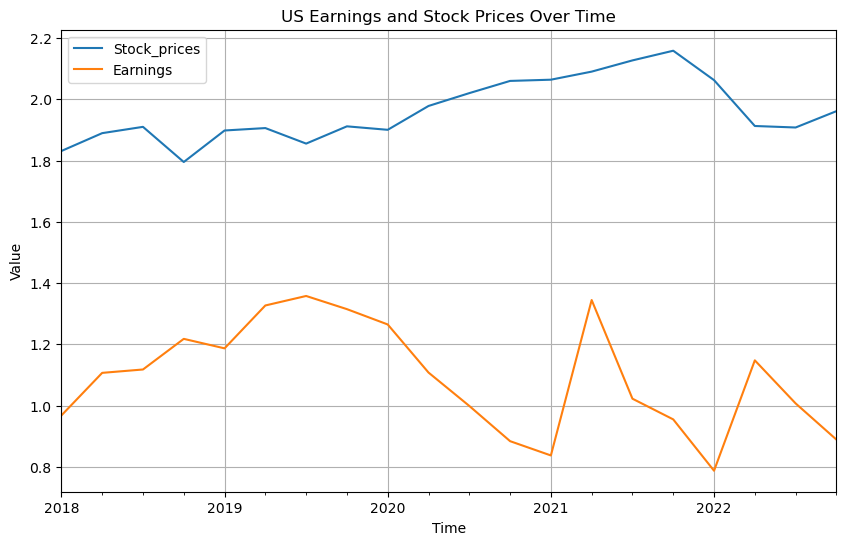

In [17]:
# Prepare data for line plot
US_plot = pd.DataFrame(US_stock_prices[['Date', 'Stock_prices']])
US_plot["Earnings"] = US_earnings['Earnings']

# Visualize the data
plt.figure(figsize=(10, 6))
US_plot.set_index("Date")['Stock_prices'].apply(lambda x: np.log10(x)).plot()
US_plot.set_index("Date")['Earnings'].plot()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('US Earnings and Stock Prices Over Time')
plt.legend()
plt.grid()
plt.show()

#### Descriptive Statistics for China Tech Companies

In [18]:
# Estimating the overall earnings and stock prices for China Tech Companies
China_earnings['Earnings'] = China_earnings.mean(axis=1)
China_stock_prices['Stock_prices'] = China_stock_prices.mean(axis=1)

# Calculate summary statistics
China_earnings_mean = China_earnings['Earnings'].mean()
China_earnings_median = China_earnings['Earnings'].median()
China_earnings_std = China_earnings['Earnings'].std()
China_earnings_range = China_earnings['Earnings'].max() - China_earnings['Earnings'].min()

China_stock_prices_mean = China_stock_prices['Stock_prices'].mean()
China_stock_prices_median = China_stock_prices['Stock_prices'].median()
China_stock_prices_std = China_stock_prices['Stock_prices'].std()
China_stock_prices_range = China_stock_prices['Stock_prices'].max() - China_stock_prices['Stock_prices'].min()


# Create a dictionary for the descriptive statistics
China_descriptive_stat = {}

# Calculate summary statistics
China_descriptive_stat["Summary Statistics"] = ['Mean', 'Median', 'Standard Deviation', 'Range']
China_descriptive_stat["Earnings"] = [China_earnings_mean, China_earnings_median, China_earnings_std, China_earnings_range]
China_descriptive_stat['Stock Prices'] = [China_stock_prices_mean, China_stock_prices_median, China_stock_prices_std, China_stock_prices_range]


# Display summary statistics
pd.DataFrame(China_descriptive_stat)

,Summary Statistics,Earnings,Stock Prices
0,Mean,3.666799,65.154522
1,Median,3.548000,61.172155
2,Standard Deviation,1.361475,14.134674
3,Range,4.694667,44.312384


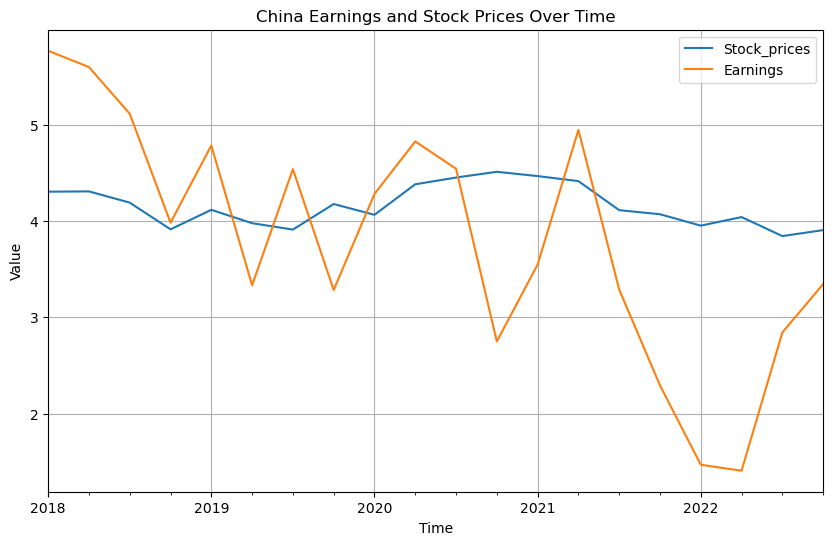

In [19]:
# Prepare data for line plot
China_plot = pd.DataFrame(China_stock_prices[['Date', 'Stock_prices']])
China_plot["Earnings"] = China_earnings['Earnings']

# Visualize the data
plt.figure(figsize=(10, 6))
China_plot.set_index("Date")['Stock_prices'].apply(lambda x: np.log(x)).plot()
China_plot.set_index("Date")['Earnings'].plot()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('China Earnings and Stock Prices Over Time')
plt.legend()
plt.grid()
plt.show()

# Comparative Analysis

In [20]:
# Calculate average price change following earnings announcements
US_avg_price_change = US_earnings["Earnings"].mean()
China_avg_price_change = China_earnings["Earnings"].mean()

# Perform t-test to compare the impact of earnings announcements
t_stat, p_value = ttest_ind(US_earnings["Earnings"], China_earnings["Earnings"])

# Perform Mann-Whitney U test as an alternative non-parametric test
u_stat, p_value_mw = mannwhitneyu(US_earnings["Earnings"], China_earnings["Earnings"])

# Print the results
print(f'Average price change (US): {round(US_avg_price_change, 4)}')
print(f'Average price change (China): {round(China_avg_price_change, 4)}')
print(f'T-test p-value: {round(p_value, 4)}')
print(f'Mann-Whitney U p-value: {round(p_value_mw, 4)}')

Average price change (US): 1.0574
Average price change (China): 3.6668
T-test p-value: 0.0
Mann-Whitney U p-value: 0.0


# Correlation Analysis

In [21]:
# Call the surprise_history_api function to generate the US surprise

# Create an empty dictionary to store the earning for each company
US_surprise = {}
for symbol, data in zip(US_ticker_symbols, US_data):
    
    US_surprise['Date'] = (data[(data['fiscalDateEnding'] >= "2018-01-01") 
                                    & (data['fiscalDateEnding'] <= "2023-12-31")]['fiscalDateEnding'])
    US_surprise[f'{symbol}'] = (data[(data['fiscalDateEnding'] >= "2018-01-01") 
                                    & (data['fiscalDateEnding'] <= "2023-12-31")]['surprise'])
    
# Convert the extracted stock prices to DataFrame
US_surprise = pd.DataFrame(US_surprise)

In [22]:
# Call the surprise_history_api function to generate the China surprise

# Create an empty dictionary to store the earning for each company
China_surprise = {}
for symbol, data in zip(China_ticker_symbols, China_data):
    
    China_surprise['Date'] = (data[(data['fiscalDateEnding'] >= "2018-01-01") 
                                    & (data['fiscalDateEnding'] <= "2023-12-31")]['fiscalDateEnding'])
    China_surprise[f'{symbol}'] = (data[(data['fiscalDateEnding'] >= "2018-01-01") 
                                    & (data['fiscalDateEnding'] <= "2023-12-31")]['surprise'])
    
# Convert the extracted stock prices to DataFrame
China_surprise = pd.DataFrame(China_surprise)

In [23]:
# Calculate correlation coefficients between earnings surprises and stock price movements
US_surprise['Surprise'] = US_surprise.mean(axis=1)
China_surprise['Surprise'] = China_surprise.mean(axis=1)


US_earnings_surprise = US_surprise['Surprise'].dropna()
China_earnings_surprise = China_surprise['Surprise']

US_correlation, US_p_value = pearsonr(US_earnings_surprise, US_earnings["Earnings"][:-1])
China_correlation, China_p_value = pearsonr(China_earnings_surprise, China_earnings["Earnings"])

# Print the results
print(f'US correlation coefficient: {round(US_correlation, 4)}, p-value: {round(US_p_value, 4)}')
print(f'China correlation coefficient: {round(China_correlation, 4)}, p-value: {round(China_p_value, 4)}')

US correlation coefficient: 0.2956, p-value: 0.1932
China correlation coefficient: 0.4596, p-value: 0.0361


# Regression Analysis

#### Data preparation for US Tech Companies for regression analysis

In [24]:
# Call the expected_reported_history_api function to generate the US expected_reported

# Create an empty dictionary to store the earning for each company
US_expected_reported = {}
for symbol, data in zip(US_ticker_symbols, US_data):
    
    US_expected_reported['Date'] = (data[(data['fiscalDateEnding'] >= "2018-01-01") 
                                    & (data['fiscalDateEnding'] <= "2023-12-31")]['fiscalDateEnding'])
    US_expected_reported[f'{symbol}_estimated'] = (data[(data['fiscalDateEnding'] >= "2018-01-01") 
                                    & (data['fiscalDateEnding'] <= "2023-12-31")]['estimatedEPS'])
    US_expected_reported[f'{symbol}_reported'] = (data[(data['fiscalDateEnding'] >= "2018-01-01") 
                                    & (data['fiscalDateEnding'] <= "2023-12-31")]['reportedEPS'])
    
# Convert the extracted stock prices to DataFrame
US_expected_reported = pd.DataFrame(US_expected_reported)

# Calculate the mean of all estimated and reported earnings in the US companies
estimated_columns = []
reported_columns = []
for column in US_expected_reported.columns:
    if 'estimated' in column.split("_"):
        estimated_columns.append(column)
    else:
        reported_columns.append(column)
        
# Create two new columns 'Estimated' and 'Reported' to be used for the regressions analysis
US_expected_reported["Expected Earnings"] = US_expected_reported[estimated_columns].mean(axis=1)
US_expected_reported["Actual Earnings"] = US_expected_reported[reported_columns].mean(axis=1)

#### Data preparation for China Tech Companies for regression analysis

In [25]:
# Call the expected_reported_history_api function to generate the China expected_reported

# Create an empty dictionary to store the earning for each company
China_expected_reported = {}
for symbol, data in zip(China_ticker_symbols, China_data):
    
    China_expected_reported['Date'] = (data[(data['fiscalDateEnding'] >= "2018-01-01") 
                                    & (data['fiscalDateEnding'] <= "2023-12-31")]['fiscalDateEnding'])
    China_expected_reported[f'{symbol}_estimated'] = (data[(data['fiscalDateEnding'] >= "2018-01-01") 
                                    & (data['fiscalDateEnding'] <= "2023-12-31")]['estimatedEPS'])
    China_expected_reported[f'{symbol}_reported'] = (data[(data['fiscalDateEnding'] >= "2018-01-01") 
                                    & (data['fiscalDateEnding'] <= "2023-12-31")]['reportedEPS'])
    
# Convert the extracted stock prices to DataFrame
China_expected_reported = pd.DataFrame(China_expected_reported)

# Calculate the mean of all estimated and reported earnings in the China companies
estimated_columns = []
reported_columns = []
for column in China_expected_reported.columns:
    if 'estimated' in column.split("_"):
        estimated_columns.append(column)
    else:
        reported_columns.append(column)
        
# Create two new columns 'Estimated' and 'Reported' to be Chinaed for the regressions analysis
China_expected_reported["Expected Earnings"] = China_expected_reported[estimated_columns].mean(axis=1)
China_expected_reported["Actual Earnings"] = China_expected_reported[reported_columns].mean(axis=1)

In [26]:
# Concatinate the US and China estimated and reported earnings.
concat_expected_report = pd.concat([US_expected_reported, China_expected_reported], ignore_index=True, join="inner").dropna()[:-1]

In [27]:
concat_stock_prices = pd.concat([US_stock_prices, China_stock_prices], ignore_index=True, join="inner")

In [28]:
import statsmodels.api as sm
concat_expected_report['Stock_price'] = concat_stock_prices['Stock_prices']

regression_data = concat_expected_report.dropna()
# Prepare the regression model with earnings announcements as the independent variable
X = sm.add_constant(regression_data[['Actual Earnings', 'Expected Earnings']])
y = regression_data['Stock_price']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the regression coefficients and p-values
coefficients = model.params
p_values = model.pvalues

# Print the results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Stock_price   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     5.839
Date:                Thu, 18 May 2023   Prob (F-statistic):            0.00636
Time:                        14:47:16   Log-Likelihood:                -173.69
No. Observations:                  39   AIC:                             353.4
Df Residuals:                      36   BIC:                             358.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                94.4548      7.271     12.990      0.000      79.708     109.201
Actual Earnings      -8.9179      3.897     -2.289      0.028     -16.821      -1.015
Expected Earnings     3.5910      6.524      0.550      0.585      -9.640      16.822
==============================================================================
Omnibus:                        2.419   Durbin-Watson:                   0.446
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                1.868
Skew:                           0.536   Prob(JB):                        0.393
Kurtosis:                       2.973   Cond. No.                         9.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""